## **Dữ liệu**
---
*Bộ dữ liệu được lấy trên https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset* <br>
Bao gồm các thông tin về khoản nợ và lịch sử chi trả/giao dịch cũng như các biến nhân khẩu học liên quan tới các khách hàng ở Đài Loan từ tháng 4/2005 đến tháng 9/2005<br>



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_rows = 4000
pd.options.display.float_format = '{:.5f}'.format 
np.set_printoptions(suppress=True, precision=5)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E:\Scorecard prediction\Creditcard.csv')
df0 = pd.read_csv(r'E:\Scorecard prediction\Creditcard.csv')

## **Thống kê mô tả**

In [3]:
# Kiểm tra dữ liệu khuyết thiếu
df0.isnull().sum().to_frame().T

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


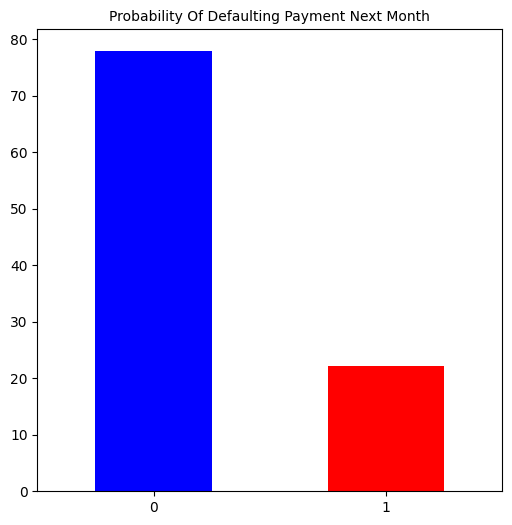

Có hiện tượng mất cân bằng dữ liệu khi dữ liệu đầu ra giữa 2 nhóm có sự chênh lệch đáng kể. 
Số lượng khách được dự đoán sẽ trả chiếm khoảng 77.88% trong khi số lượng sẽ nợ chỉ 22.12%.


In [82]:
# Kiểm tra dữ liệu đầu ra

default_count = (df0['default.payment.next.month'].value_counts(normalize=True)*100)
default_count.plot.bar(figsize=(6,6), color =['b','r'])
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=10)
plt.show()
pass

print("Có hiện tượng mất cân bằng dữ liệu khi dữ liệu đầu ra giữa 2 nhóm có sự chênh lệch đáng kể. \nSố lượng khách được dự đoán sẽ trả chiếm khoảng {}% trong khi số lượng sẽ nợ chỉ {}%."
      .format(round(default_count[0],3), round(default_count[1],3)))

Dữ liệu về tiền có số lượng outliers cao và khoảng cách lớn. 
Vì vậy khi đưa dữ liệu vào cần chuẩn hóa để mô hình có kết quả tốt nhất.


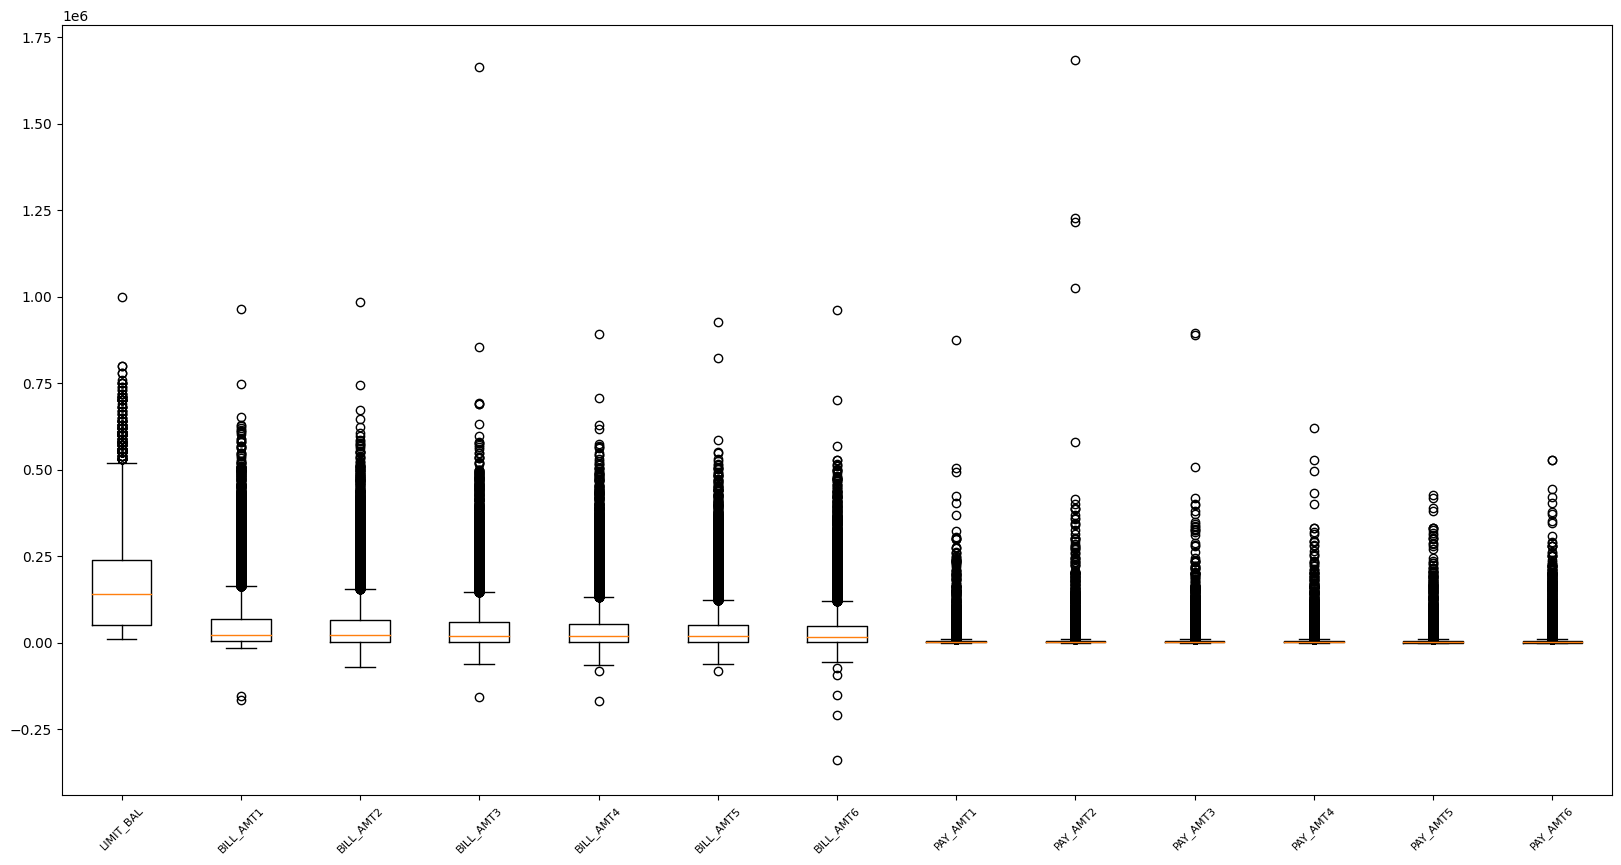

In [89]:
# Kiểm tra outlier
print("Dữ liệu về tiền có số lượng outliers cao và khoảng cách lớn. \nVì vậy khi đưa dữ liệu vào cần chuẩn hóa để mô hình có kết quả tốt nhất.")

numer = df0[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
fig, ax1 = plt.subplots(figsize =(20, 10))
ax1
ax1.set_xticklabels(numer, rotation=45, fontsize=8) #đặt tên - kích thước cho các biến trục hoàng
plt.boxplot(numer)
plt.show()

### Default or not
---
* Nhìn chung thì nhóm có học vấn (2) đại học và tốt nghiệp cấp 3 (1) có xu hướng trả nợ đúng hạn và vay nhiều
* Số lượng phụ nữ có xu hướng trả nợ đúng hạn và tỉ lệ trả nợ cao hơn đàn ông

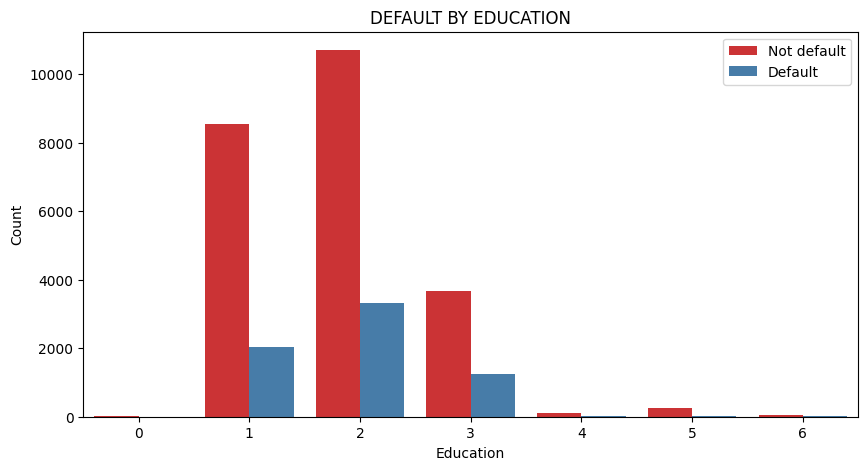

In [86]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=df0, palette = 'Set1')
ax.set(xlabel='Education', ylabel='Count')
plt.title("DEFAULT BY EDUCATION", fontdict = {'fontsize':12})
LAB = {'Not default','Default'}
ax.legend(labels=LAB)
pass

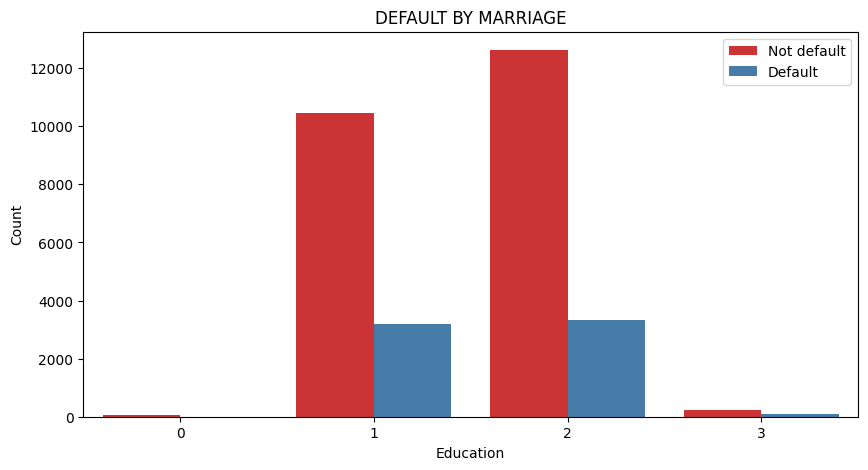

In [87]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="MARRIAGE", hue="default.payment.next.month", data=df0, palette = 'Set1')
ax.set(xlabel='Education', ylabel='Count')
plt.title("DEFAULT BY MARRIAGE", fontdict = {'fontsize':12})
LAB = {'Not default','Default'}
ax.legend(labels=LAB)
pass

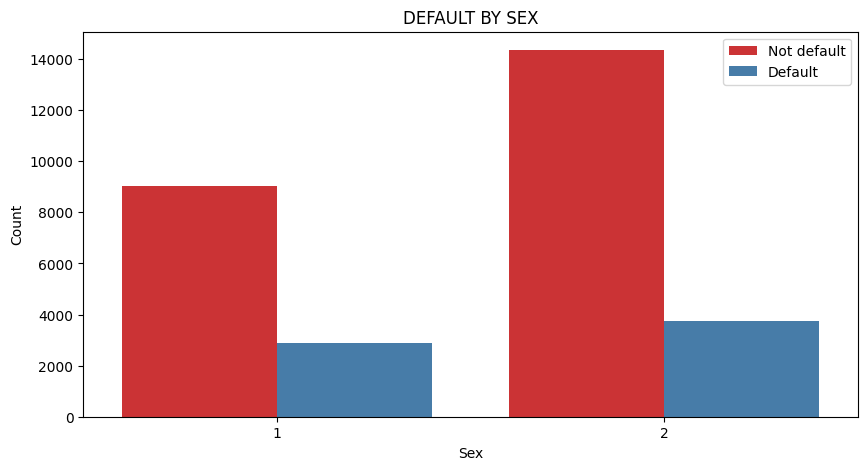

In [90]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="SEX", hue="default.payment.next.month", data=df0, palette = 'Set1')
ax.set(xlabel='Sex', ylabel='Count')
plt.title("DEFAULT BY SEX", fontdict = {'fontsize':12})
LAB = {'Not default','Default'}
ax.legend(labels=LAB)
pass

Ở đây có thể thấy số lượng khách hàng nữ trong độ tuổi 20-30 có xu hướng tiếp tục nợ cao hơn so với nam.
 Vì vậy có thể giữ lại nhóm giới tính cũng như độ tuổi trong mô hình dự đoán.


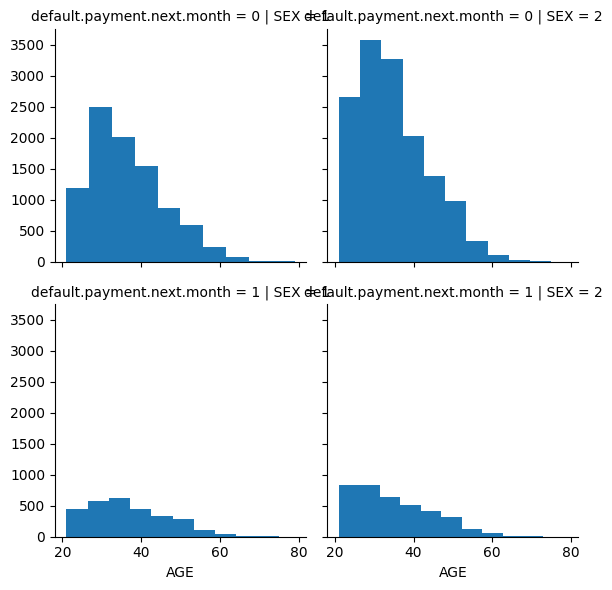

In [92]:
print("Ở đây có thể thấy số lượng khách hàng nữ trong độ tuổi 20-30 có xu hướng tiếp tục nợ cao hơn so với nam.\n Vì vậy có thể giữ lại nhóm giới tính cũng như độ tuổi trong mô hình dự đoán.")

g =sns.FacetGrid(df0, row='default.payment.next.month',col='SEX')
g.map(plt.hist, 'AGE')
pass

Cột Education có nhóm 4,5,6 có số lượng khá ít và không thuộc các nhóm chính. 
 Vì vậy dữ liệu này sẽ đưa vào chung thành một nhóm. 
 Tương tự với dữ liệu MARRIAGE, dữ liệu nhóm 0 và 3 sẽ gộp thành một nhóm.


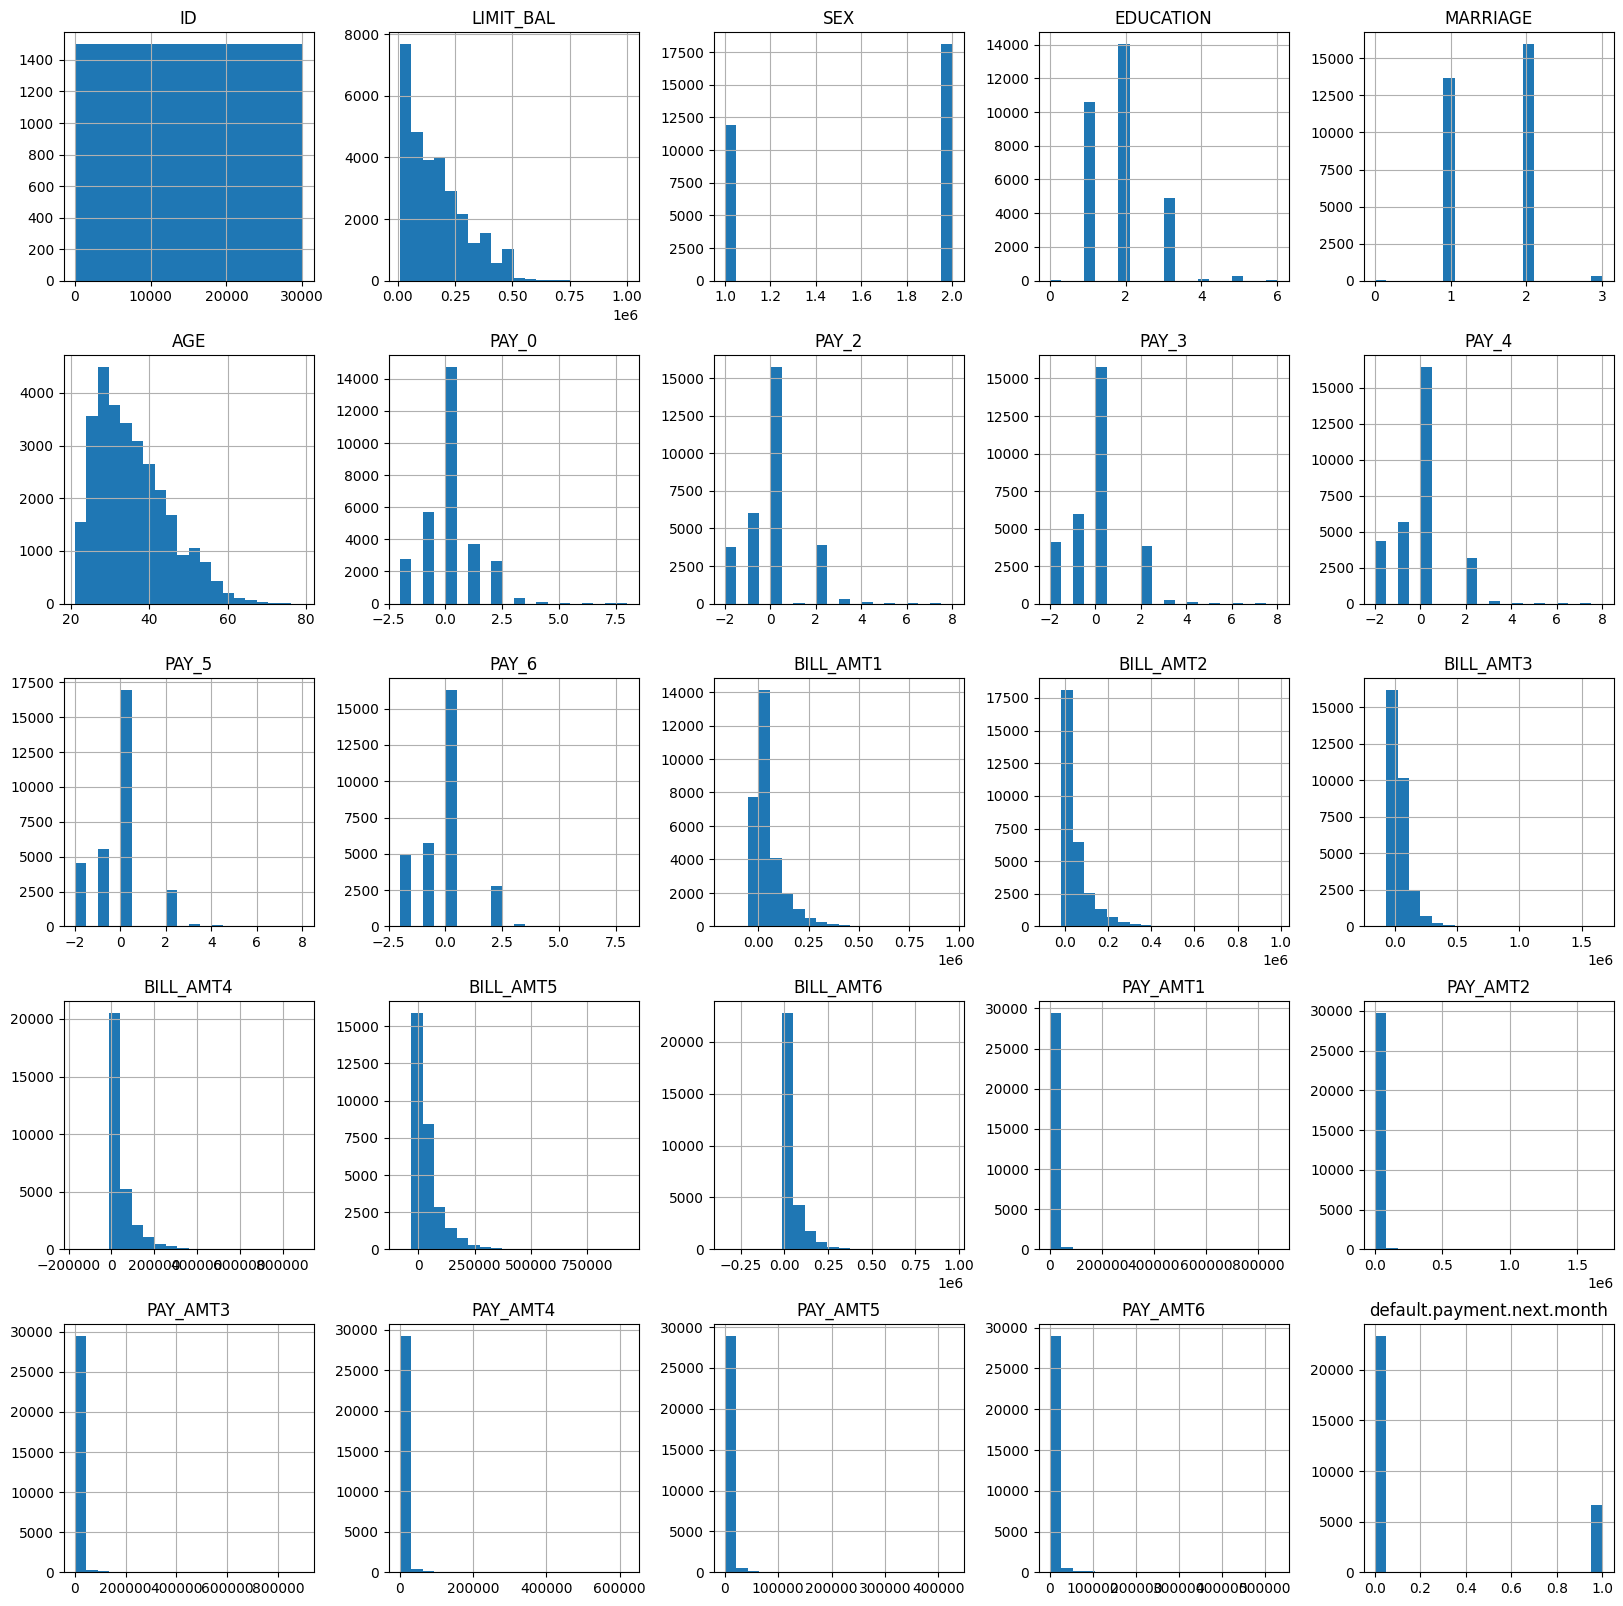

In [8]:
df0.hist(figsize=(20,20), bins=20)
pass

print('Cột Education có nhóm 4,5,6 có số lượng khá ít và không thuộc các nhóm chính. \n Vì vậy dữ liệu này sẽ đưa vào chung thành một nhóm. \n Tương tự với dữ liệu MARRIAGE, dữ liệu nhóm 0 và 3 sẽ gộp thành một nhóm.' )

## **TIỀN XỬ LÝ DỮ LIỆU**

Thay thế các dữ liệu đã đề cập phía trên và loại bỏ biến đầu ra khỏi đầu vào chính

In [9]:
df =df.rename(columns={"default.payment.next.month": "default","PAY_0": "PAY_1"})
df['EDUCATION'].replace([5,6],4)
df['MARRIAGE'].replace(0,3)

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64

In [10]:
#Thay thế các giá trị lỗi
df['PAY_1'] =df['PAY_1'].replace(-2,-1)
df['PAY_2'] =df['PAY_2'].replace(-2,-1)
df['PAY_3'] =df['PAY_3'].replace(-2,-1)
df['PAY_4'] =df['PAY_4'].replace(-2,-1)
df['PAY_5'] =df['PAY_5'].replace(-2,-1)
df['PAY_6'] =df['PAY_6'].replace(-2,-1)

In [11]:
#Loại bỏ output khỏi đầu vào chính
df1 =df.drop(columns= ['default','ID'])

In [12]:
#Chuyển các biến str thành dạng categories
df1 = pd.get_dummies(data=df1, columns=['SEX', 'MARRIAGE', 'EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
df2 = df['default']

In [13]:
#Có nên get dummies biến đầu ra không ??
#target = pd.get_dummies(data=df2).values

## **Giảm chiều dữ liệu**
---
*Ở đây sẽ dùng phương pháp giảm chiều dữ liệu Random forest dựa trên lượng thông tin nhận về càng lớn càng tốt. Và dùng làm đầu vào cho Neural network ở phía sau* 

Quá trình cũng sử dụng Smote do các features có độ lớn khác nhau và Scale để chuẩn hóa dữ liệu đầu vào loại bỏ các outliers.

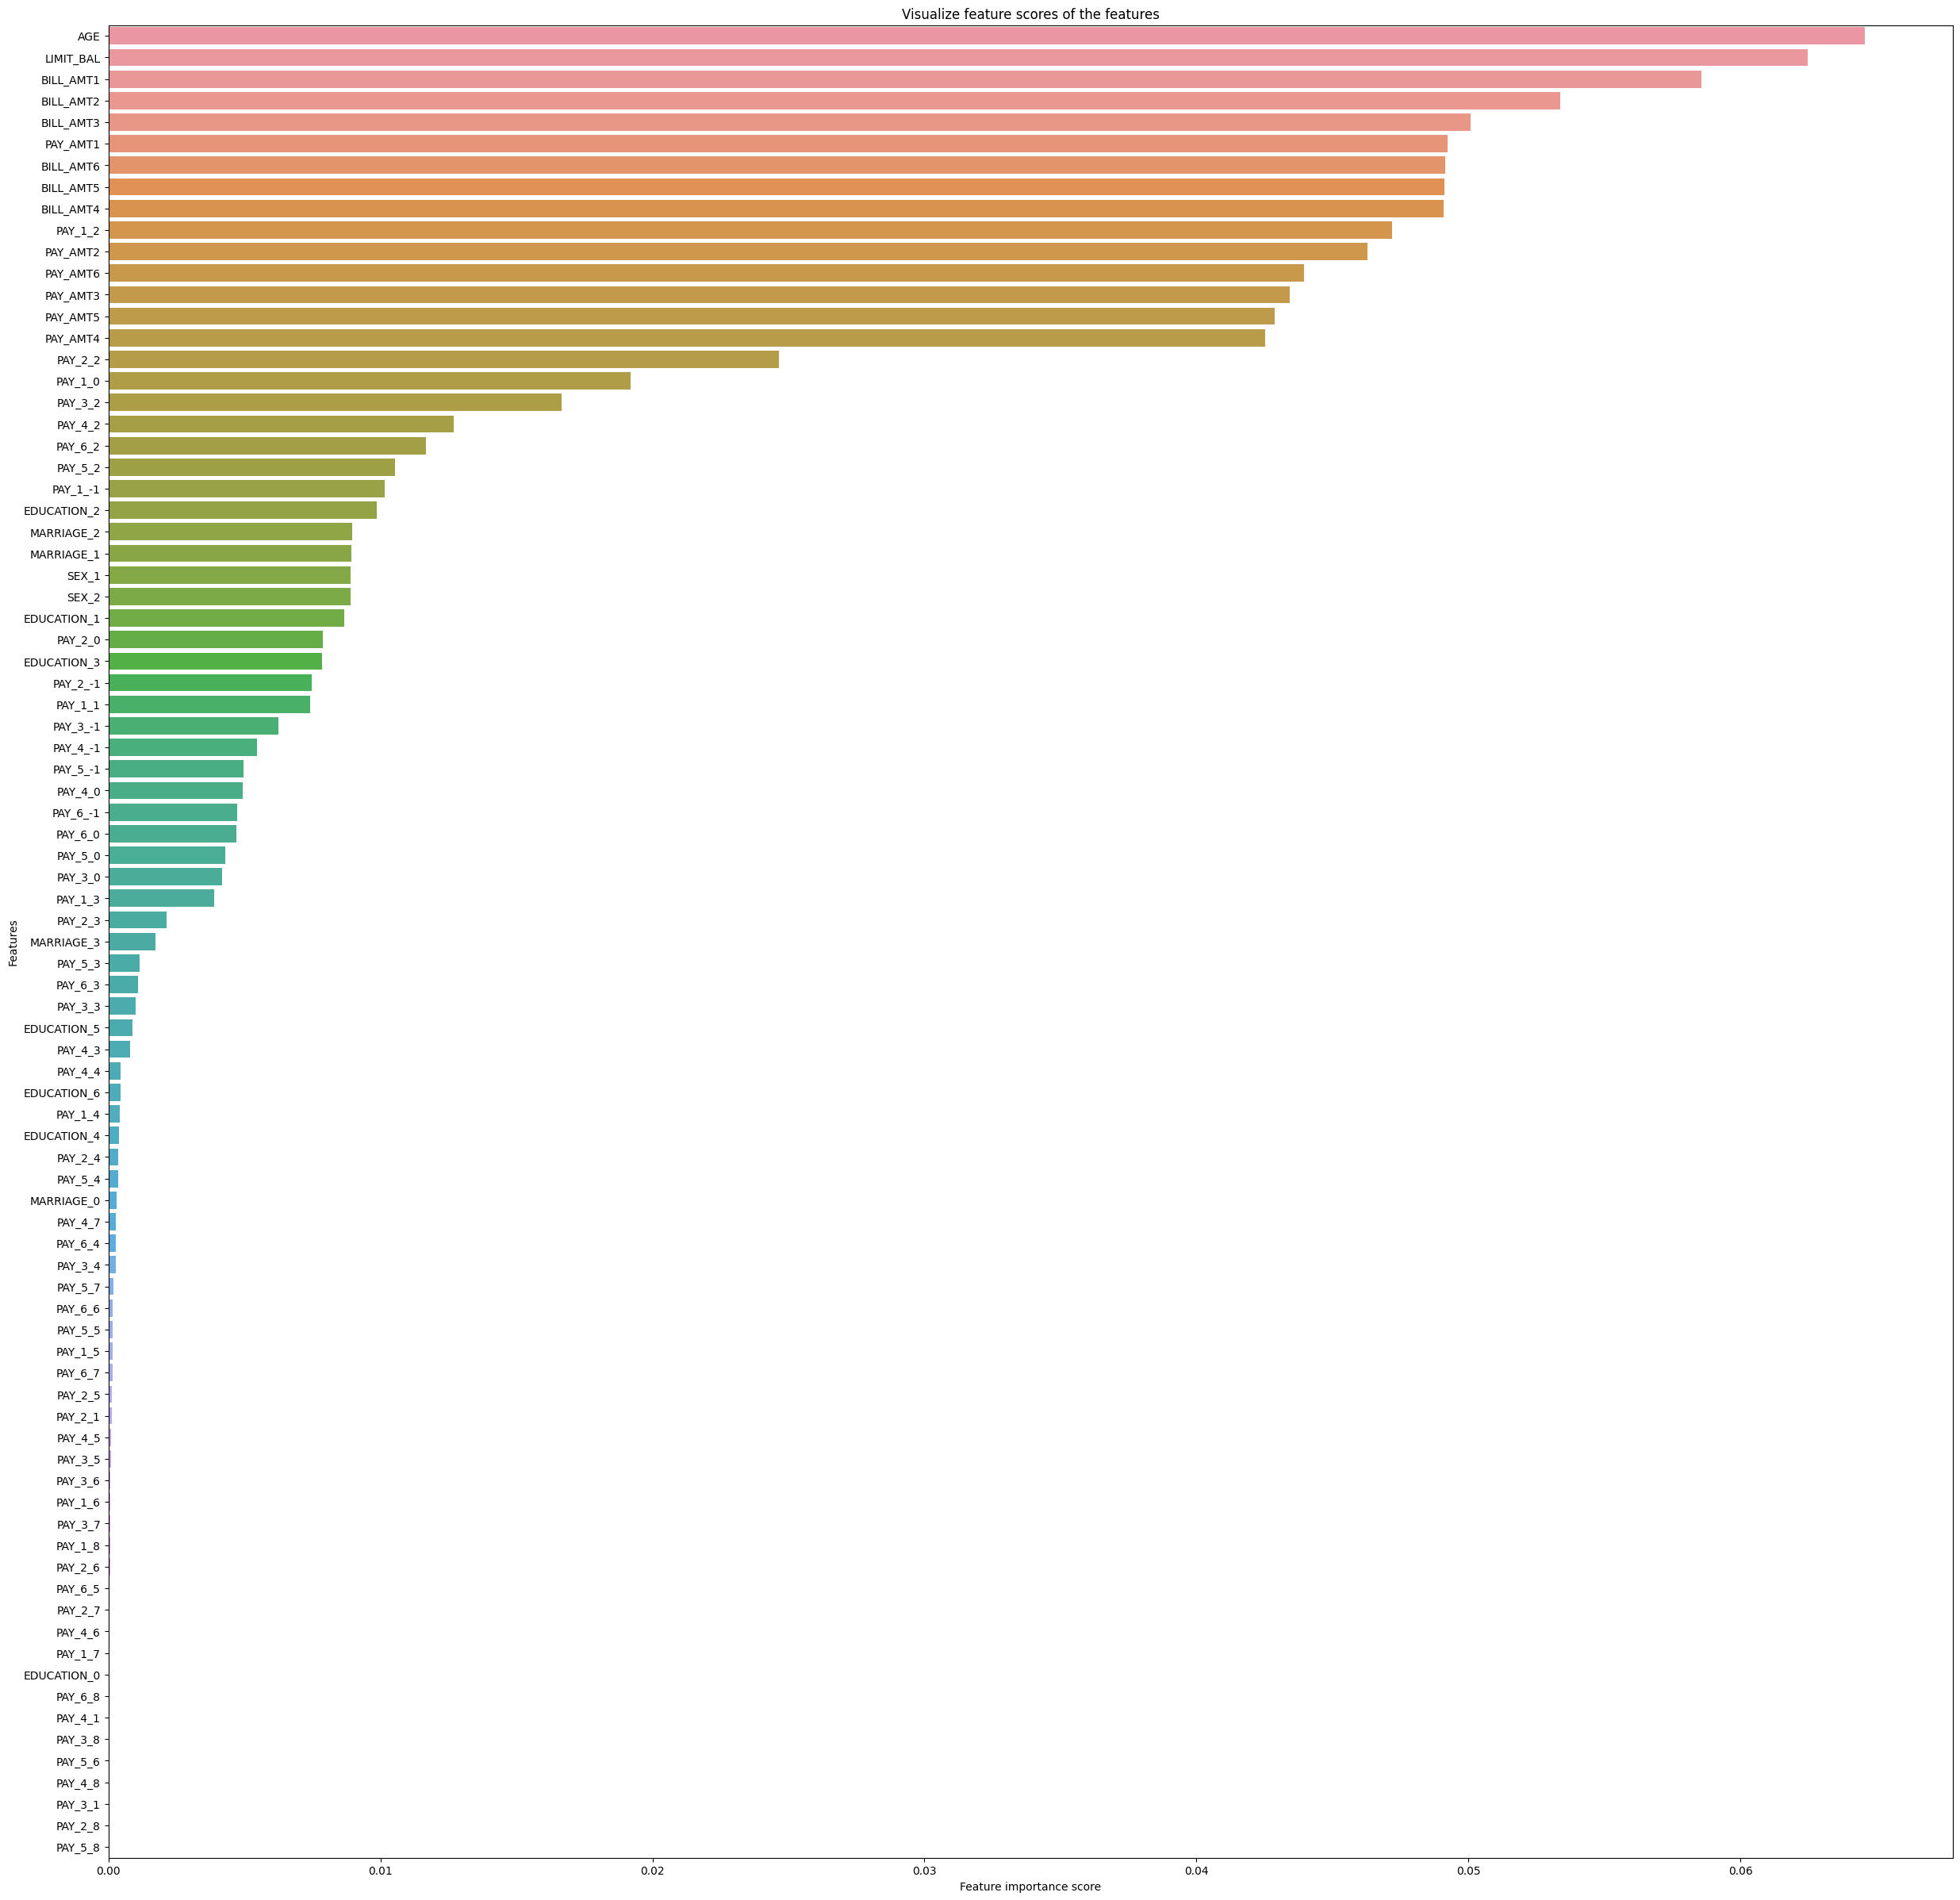

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(df1, df2)

feature_scores = pd.Series(clf.feature_importances_, index=df1.columns).sort_values(ascending=False)
feature_scores

f, ax = plt.subplots(figsize=(30, 30))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [15]:
# Lựa chọn các features có importance lớn hơn mức trung vị để giữ được các biến định tính có ý nghĩa trong mô hình

feature_scores2 = feature_scores[feature_scores >= feature_scores.median()]
feature_scores2

AGE           0.06457
LIMIT_BAL     0.06246
BILL_AMT1     0.05858
BILL_AMT2     0.05336
BILL_AMT3     0.05007
PAY_AMT1      0.04924
BILL_AMT6     0.04914
BILL_AMT5     0.04912
BILL_AMT4     0.04908
PAY_1_2       0.04720
PAY_AMT2      0.04628
PAY_AMT6      0.04396
PAY_AMT3      0.04343
PAY_AMT5      0.04287
PAY_AMT4      0.04253
PAY_2_2       0.02465
PAY_1_0       0.01921
PAY_3_2       0.01666
PAY_4_2       0.01271
PAY_6_2       0.01166
PAY_5_2       0.01054
PAY_1_-1      0.01015
EDUCATION_2   0.00987
MARRIAGE_2    0.00896
MARRIAGE_1    0.00894
SEX_1         0.00892
SEX_2         0.00891
EDUCATION_1   0.00868
PAY_2_0       0.00787
EDUCATION_3   0.00786
PAY_2_-1      0.00748
PAY_1_1       0.00742
PAY_3_-1      0.00626
PAY_4_-1      0.00547
PAY_5_-1      0.00496
PAY_4_0       0.00493
PAY_6_-1      0.00475
PAY_6_0       0.00471
PAY_5_0       0.00431
PAY_3_0       0.00417
PAY_1_3       0.00390
PAY_2_3       0.00214
MARRIAGE_3    0.00173
dtype: float64

In [16]:
df3 = df1.drop(columns = feature_scores[feature_scores < feature_scores.median()].to_frame().T.iloc[:,])
df3

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_3_2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_6_-1,PAY_6_0,PAY_6_2
0,20000.00000,24,3913.00000,3102.00000,689.00000,0.00000,0.00000,0.00000,0.00000,689.00000,...,0,1,0,0,1,0,0,1,0,0
1,120000.00000,26,2682.00000,1725.00000,2682.00000,3272.00000,3455.00000,3261.00000,0.00000,1000.00000,...,0,0,1,0,0,1,0,0,0,1
2,90000.00000,34,29239.00000,14027.00000,13559.00000,14331.00000,14948.00000,15549.00000,1518.00000,1500.00000,...,0,0,1,0,0,1,0,0,1,0
3,50000.00000,37,46990.00000,48233.00000,49291.00000,28314.00000,28959.00000,29547.00000,2000.00000,2019.00000,...,0,0,1,0,0,1,0,0,1,0
4,50000.00000,57,8617.00000,5670.00000,35835.00000,20940.00000,19146.00000,19131.00000,2000.00000,36681.00000,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.00000,39,188948.00000,192815.00000,208365.00000,88004.00000,31237.00000,15980.00000,8500.00000,20000.00000,...,0,0,1,0,0,1,0,0,1,0
29996,150000.00000,43,1683.00000,1828.00000,3502.00000,8979.00000,5190.00000,0.00000,1837.00000,3526.00000,...,0,1,0,0,0,1,0,0,1,0
29997,30000.00000,37,3565.00000,3356.00000,2758.00000,20878.00000,20582.00000,19357.00000,0.00000,0.00000,...,1,1,0,0,0,1,0,0,1,0
29998,80000.00000,41,-1645.00000,78379.00000,76304.00000,52774.00000,11855.00000,48944.00000,85900.00000,3409.00000,...,0,0,1,0,0,1,0,1,0,0


In [17]:
feature_scores2 = np.array([feature_scores2])
feature_scores2.shape

(1, 43)

In [18]:
#Trước khi đưa dữ liệu vào cần SMOTE để tránh những cột có giá trị quá lớn trong khi các cột biến phân loại có giá trị quá nhỏ

from imblearn.over_sampling import SMOTE

# Upsampling with SMOTE algorithm
smote = SMOTE(random_state= None ,k_neighbors= 5)

X_smote, y_smote = smote.fit_resample(df3, df2)

print(f'''Shape of X before SMOTE: {df3.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smote.value_counts()


Shape of X before SMOTE: (30000, 43)
Shape of X after SMOTE: (46728, 43)

Balance of positive and negative classes (%):


1    23364
0    23364
Name: default, dtype: int64

In [19]:
#Scale dữ liệu
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_smote_scaled=mms.fit_transform(X_smote)
x_smote_scaled

array([[0.0101 , 0.05172, 0.14998, ..., 1.     , 0.     , 0.     ],
       [0.11111, 0.08621, 0.14889, ..., 0.     , 0.     , 1.     ],
       [0.08081, 0.22414, 0.17239, ..., 0.     , 1.     , 0.     ],
       ...,
       [0.04501, 0.01724, 0.1869 , ..., 0.     , 1.     , 0.     ],
       [0.07071, 0.12069, 0.19067, ..., 0.     , 1.     , 0.     ],
       [0.0101 , 0.5    , 0.16077, ..., 0.     , 1.     , 0.     ]])

## **Dự đoán bằng NEURAL NETWORK**


In [20]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote_scaled,y_smote,test_size=0.25,random_state=30)
print("Variables in Train Set : {} & Test Set : {}".format(len(x_train), len(x_test)))

Variables in Train Set : 35046 & Test Set : 11682


In [21]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model
pass

In [22]:
#Nhập các thông số đầu vào cho mạng neuron 
model.add(tf.keras.layers.Dense(units=43,activation='sigmoid', use_bias = True)) #input layer với 43 đầu vào
model.add(tf.keras.layers.Dense(units=88,activation='sigmoid', use_bias = True)) #hidden layer với số node = n1*2 +2 
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                   #output layer

In [23]:
#Hàm loss và optimizer
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [24]:
#Hàm loss và optimizer
from keras import models, layers, optimizers, regularizers
learning_rate = 0.01
model.compile(optimizer=optimizers.Adam(lr = learning_rate),loss= 'binary_crossentropy',metrics=['accuracy'])

In [25]:
training = model.fit(x_train,y_train,batch_size=32,epochs= 50)
#https://www.kaggle.com/code/timniven/feedforward-neural-network-tutorial -------- link vẽ biểu đồ

Epoch 1/50
1096/1096 [==============================] - 3s 1ms/step - loss: 0.3623 - accuracy: 0.8471
Epoch 2/50
1096/1096 [==============================] - 1s 1ms/step - loss: 0.3301 - accuracy: 0.8627
Epoch 3/50
1096/1096 [==============================] - 1s 1ms/step - loss: 0.3228 - accuracy: 0.8663
Epoch 4/50
1096/1096 [==============================] - 1s 1ms/step - loss: 0.3189 - accuracy: 0.8668
Epoch 5/50
1096/1096 [==============================] - 1s 1ms/step - loss: 0.3148 - accuracy: 0.8688
Epoch 6/50
1096/1096 [==============================] - 1s 1ms/step - loss: 0.3131 - accuracy: 0.8696
Epoch 7/50
1096/1096 [==============================] - 1s 1ms/step - loss: 0.3102 - accuracy: 0.8709
Epoch 8/50
1096/1096 [==============================] - 2s 1ms/step - loss: 0.3082 - accuracy: 0.8725
Epoch 9/50
1096/1096 [==============================] - 1s 1ms/step - loss: 0.3075 - accuracy: 0.8720
Epoch 10/50
1096/1096 [==============================] - 1s 1ms/step - loss: 0.305

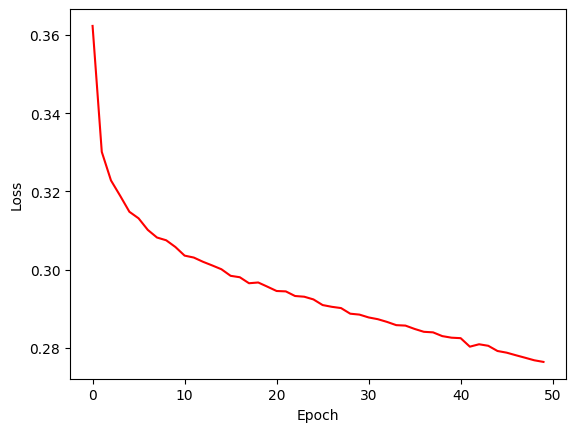

In [26]:
plt.plot(training.history['loss'],'r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
pass

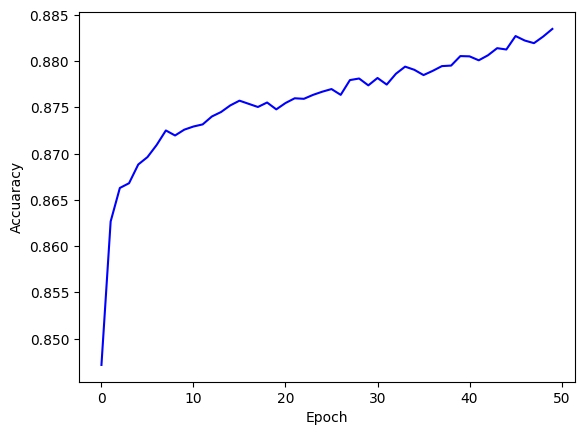

In [27]:
plt.plot(training.history['accuracy'], 'b')
plt.xlabel("Epoch")
plt.ylabel("Accuaracy")
plt.show()
pass

In [28]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict(x_test))
roc_auc = metrics.auc(fpr, tpr)
#https://www.kaggle.com/code/thejas2002/notebook6ca73be3d5#4:-TRAIN-AND-EVALUATE-AN-XGBOOST-CLASSIFIER - link vẽ biểu đồ 2
#https://www.kaggle.com/code/prashant111/svm-classifier-tutorial#17.-Classification-metrices- --- link vẽ biểu đồ 3

366/366 [==============================] - 0s 849us/step


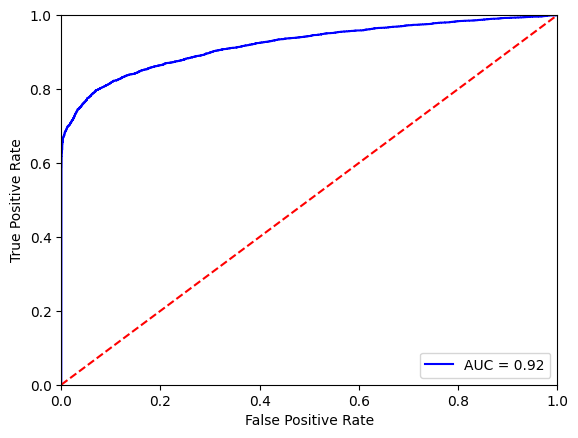

In [29]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc =  'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
pass

In [30]:
# Độ chính xác của các tập dữ liệu
train_score = model.evaluate(x_train, y_train, verbose =2)
test_score = model.evaluate(x_test, y_test,verbose =2)
val_score = model.evaluate(x_smote_scaled, y_smote, verbose =2)
pass

1096/1096 - 1s - loss: 0.2710 - accuracy: 0.8850 - 965ms/epoch - 880us/step
366/366 - 0s - loss: 0.3449 - accuracy: 0.8621 - 331ms/epoch - 905us/step
1461/1461 - 1s - loss: 0.2895 - accuracy: 0.8793 - 1s/epoch - 798us/step


## **KẾT QUẢ**

In [31]:
print('Độ chính xác của model trên tập training là {}%'.format(round(train_score[1],3)*100))
print('Độ chính xác của model trên tập test là {}%'.format(round(test_score[1],4)*100))
print('ROC_AUC là {}%'.format(round(roc_auc,4)*100))

pass

Độ chính xác của model trên tập training là 88.5%
Độ chính xác của model trên tập test là 86.21%
ROC_AUC là 92.09%
